Assignment 2

Name: Srinidhi Acharla

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

In [2]:
X_train = pd.read_csv("C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week9_Assignment/X_train.csv")
X_test = pd.read_csv("C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week9_Assignment/X_test.csv")
y_train = pd.read_csv("C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week9_Assignment/y_train.csv")
y_test = pd.read_csv("C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week9_Assignment/y_test.csv")

### 1.1 MLP With Sklearn

In [3]:
%%time

model1 = MLPClassifier(
    hidden_layer_sizes=(60,50,40), 
    activation = 'relu',
    solver='adam',
    alpha=0.0001, # Strength of the L2 regularization term
    batch_size='auto',
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    max_iter=200,
    tol=0.00001, 
    early_stopping = True,
    n_iter_no_change = 5,
    verbose=True
    
)
_ = model1.fit(X_train, y_train)


C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names

Iteration 1, loss = 0.70259632
Validation score: 0.509091
Iteration 2, loss = 0.69375608
Validation score: 0.509091
Iteration 3, loss = 0.68805896
Validation score: 0.509091
Iteration 4, loss = 0.68239705
Validation score: 0.600000
Iteration 5, loss = 0.67597486
Validation score: 0.800000
Iteration 6, loss = 0.66753315
Validation score: 0.854545
Iteration 7, loss = 0.65727127
Validation score: 0.872727
Iteration 8, loss = 0.64386828
Validation score: 0.872727
Iteration 9, loss = 0.62681780
Validation score: 0.890909
Iteration 10, loss = 0.60493364


C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

Validation score: 0.890909
Iteration 11, loss = 0.57625000
Validation score: 0.945455
Iteration 12, loss = 0.54096823
Validation score: 0.963636
Iteration 13, loss = 0.49952854
Validation score: 0.945455
Iteration 14, loss = 0.45281900
Validation score: 0.945455
Iteration 15, loss = 0.40017231
Validation score: 0.945455
Iteration 16, loss = 0.34330732
Validation score: 0.945455
Iteration 17, loss = 0.28582704
Validation score: 0.945455
Iteration 18, loss = 0.23141771
Validation score: 0.963636
Validation score did not improve more than tol=0.000010 for 5 consecutive epochs. Stopping.
CPU times: total: 688 ms
Wall time: 487 ms


C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [4]:
model1.loss_curve_

[0.7025963171480636,
 0.6937560783173451,
 0.6880589596549569,
 0.6823970524928575,
 0.6759748611025294,
 0.6675331532896235,
 0.6572712678959425,
 0.6438682834402458,
 0.6268178013015221,
 0.6049336377239363,
 0.5762500015402772,
 0.5409682344587706,
 0.49952853784212303,
 0.4528189987105421,
 0.4001723080597711,
 0.3433073200885897,
 0.28582703502204093,
 0.23141770735294212]

In [5]:
%%time
y_pred = model1.predict(X_test)

CPU times: total: 844 ms
Wall time: 442 ms


In [6]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.8768    0.9343     58152
           1     0.0200    0.9605    0.0391       152

    accuracy                         0.8770     58304
   macro avg     0.5099    0.9187    0.4867     58304
weighted avg     0.9973    0.8770    0.9320     58304



In [7]:
y_pred = model1.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

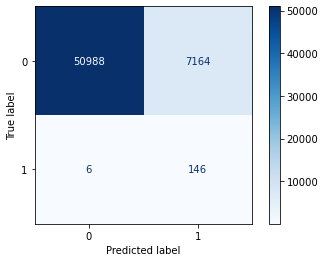

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Inference: 

##### As per the above it can be seen that out of the 58304 instances in the dataset, 51034 instances (50988 + 146) were correctly classified, and 7,270 instances (7164 + 6) were misclassified.

##### From True label 0, we can see that the model is predicting the TN values of 50988 and the FP of 7164 
##### From True label 1, we can see that the model is predicting the TP values of 146 and the FN of 6.

##### This means that the model performs accuractely in predicting the negatice class  with large number of true negatives and the relatively small false positives whereas the model performs poorly in predciting the postivie class of small number of true positives and a relatively large number of false negatives.




#### Proceeding further we will be predicting using the f1 scoring metric using the Randomize Search CV.

## 1.2 With RandomizedSearchCV

In [86]:
%%time

param_distributions = {
    'hidden_layer_sizes': [ (64,), (128,),(128,64), (64,128), (64,128,196), (196,128,64)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .0001, .0005, .001, .005],
    'batch_size': [25, 50, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0005, 0.001, 0.005, 0.01],
    'max_iter': [5000],
    'tol': [0.000005, 0.00001, 0.00005],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

random_search = RandomizedSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_distributions=param_distributions, 
    cv=3, 
    n_iter=300,
    scoring='f1', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = random_search.fit(X_train, y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits


C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names

CPU times: total: 10.2 s
Wall time: 13min


In [88]:
print(f"The best f1 score is {random_search.best_score_}")
print(f"... with parameters: {random_search.best_params_}")

model2 = random_search.best_estimator_

print(random_search.best_params_)


The best f1 score is 0.9797417233881323
... with parameters: {'tol': 5e-06, 'solver': 'adam', 'n_iter_no_change': 5, 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (64, 128), 'early_stopping': True, 'batch_size': 25, 'alpha': 0.001, 'activation': 'tanh'}
{'tol': 5e-06, 'solver': 'adam', 'n_iter_no_change': 5, 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (64, 128), 'early_stopping': True, 'batch_size': 25, 'alpha': 0.001, 'activation': 'tanh'}


In [11]:
%%time
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9853    0.9926     58152
           1     0.1493    0.9868    0.2593       152

    accuracy                         0.9853     58304
   macro avg     0.5746    0.9861    0.6259     58304
weighted avg     0.9977    0.9853    0.9907     58304

CPU times: total: 2.03 s
Wall time: 1.11 s


##### As per the above, it can be seen that the f1-score for the employment rate is 99% and predicted the unemployment rate of 25%. This means that the model is performing best at predicting the negative class but performs well in predicting the postive class. This is because of the low number of true positives and large number of false negatives.

In [12]:
y_pred = model2.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

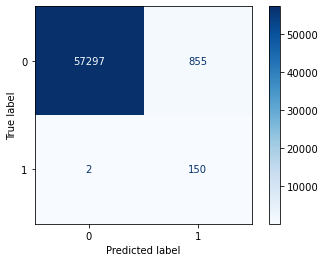

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

##### From True label 0, we can see that the model is predicting the TN values of 57297 and the FP of 855 
##### From True label 1, we can see that the model is predicting the TP values of 150 and the FN of 2.

##### This means that the model performs accuractely in predicting the negatice class  with large number of true negatives and the relatively small false positives whereas the model performs poorly in predciting the postivie class of small number of true positives and a relatively large number of false negatives.


## 2.1 Wide Network

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model_wide = keras.models.Sequential()
model_wide.add(keras.layers.Input(1472))
model_wide.add(keras.layers.Dense(256, activation="relu"))
model_wide.add(keras.layers.Dense(1, activation="sigmoid"))

In [14]:
model_wide.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               377088    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 377,345
Trainable params: 377,345
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_wide.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
history = model_wide.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
18/18 [==============================] - 6s 295ms/step - loss: 0.6683 - accuracy: 0.5949 - val_loss: 0.6851 - val_accuracy: 0.4059
Epoch 2/50
18/18 [==============================] - 4s 214ms/step - loss: 0.5936 - accuracy: 0.8723 - val_loss: 0.5938 - val_accuracy: 0.7637
Epoch 3/50
18/18 [==============================] - 5s 297ms/step - loss: 0.5035 - accuracy: 0.9745 - val_loss: 0.4851 - val_accuracy: 0.8923
Epoch 4/50
18/18 [==============================] - 4s 241ms/step - loss: 0.3993 - accuracy: 0.9726 - val_loss: 0.4225 - val_accuracy: 0.9001
Epoch 5/50
18/18 [==============================] - 4s 242ms/step - loss: 0.2970 - accuracy: 0.9891 - val_loss: 0.3418 - val_accuracy: 0.9582
Epoch 6/50
18/18 [==============================] - 5s 280ms/step - loss: 0.2102 - accuracy: 0.9891 - val_loss: 0.3251 - val_accuracy: 0.9653
Epoch 7/50
18/18 [==============================] - 5s 281ms/step - loss: 0.1480 - accuracy: 0.9927 - val_loss: 0.2610 - val_accuracy: 0.9857
Epoch 

In [17]:
loss, accuracy = model_wide.evaluate(X_test, y_test)

1822/1822 [==============================] - 7s 4ms/step - loss: 0.2218 - accuracy: 0.9682


In [18]:
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

Loss 0.22183
Accuracy 0.9682


#### Previously the value of the loss is 0.63714 and the value of the accuracy is 0.5709, indicating that the model is not performing well on the test data while the optimizer was Stochastic gradient descent. But after using the adam optimizer the training of the model is relatively improved with a loss 0f 0.22183 and an accuracy of 0.9682. This doesn't necessarily mean that the dataset is rich in its context. Adding more features and a complex dataset can be helpful in creating better learning models. 

In [19]:
model_wide.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               377088    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 377,345
Trainable params: 377,345
Non-trainable params: 0
_________________________________________________________________


In [20]:
import collections

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

[('Unemployment Rate', 1)]


1822/1822 [==============================] - 7s 4ms/step


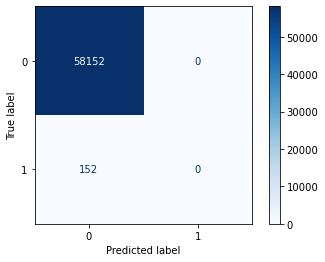

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9974    1.0000    0.9987     58152
           1     0.0000    0.0000    0.0000       152

    accuracy                         0.9974     58304
   macro avg     0.4987    0.5000    0.4993     58304
weighted avg     0.9948    0.9974    0.9961     58304



C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.2 Deep network

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model_deep = keras.models.Sequential()
model_deep.add(keras.layers.Input(1472))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(1, activation="sigmoid"))

We can also create this network using the syntax below...

In [25]:
input_ = keras.layers.Input(1472)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
output = keras.layers.Dense(1, activation="sigmoid")(hidden4)
model_deep = keras.Model(inputs=[input_], outputs=[output])

In [26]:
model_deep.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
history = model_deep.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
18/18 [==============================] - 14s 387ms/step - loss: 0.6923 - accuracy: 0.5438 - val_loss: 0.7022 - val_accuracy: 0.1035
Epoch 2/50
18/18 [==============================] - 4s 217ms/step - loss: 0.6918 - accuracy: 0.5511 - val_loss: 0.7053 - val_accuracy: 0.0616
Epoch 3/50
18/18 [==============================] - 4s 206ms/step - loss: 0.6914 - accuracy: 0.5401 - val_loss: 0.7056 - val_accuracy: 0.0659
Epoch 4/50
18/18 [==============================] - 9s 502ms/step - loss: 0.6909 - accuracy: 0.5274 - val_loss: 0.7082 - val_accuracy: 0.0515
Epoch 5/50
18/18 [==============================] - 8s 473ms/step - loss: 0.6905 - accuracy: 0.5328 - val_loss: 0.7078 - val_accuracy: 0.0614
Epoch 6/50
18/18 [==============================] - 9s 524ms/step - loss: 0.6900 - accuracy: 0.5237 - val_loss: 0.7098 - val_accuracy: 0.0541
Epoch 7/50
18/18 [==============================] - 5s 301ms/step - loss: 0.6897 - accuracy: 0.5255 - val_loss: 0.7117 - val_accuracy: 0.0487
Epoch

In [28]:
loss, accuracy = model_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

1822/1822 [==============================] - 6s 3ms/step - loss: 0.6607 - accuracy: 0.5823
Loss 0.66074
Accuracy 0.5823


In [29]:
model_deep.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1472)]            0         
                                                                 
 dense_6 (Dense)             (None, 128)               188544    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 238,209
Trainable params: 238,209
Non-trainable

[('Unemployment Rate', 1)]
1822/1822 [==============================] - 9s 3ms/step


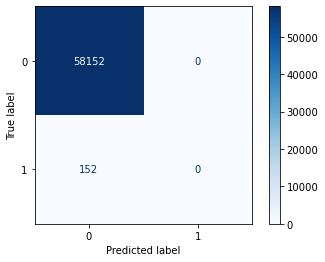

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

# display the confusion matrix
y_pred = model_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9974    1.0000    0.9987     58152
           1     0.0000    0.0000    0.0000       152

    accuracy                         0.9974     58304
   macro avg     0.4987    0.5000    0.4993     58304
weighted avg     0.9948    0.9974    0.9961     58304



C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.3 Wide and Deep Network

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
input_ = keras.layers.Input(1472)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_wide_deep = keras.Model(inputs=[input_], outputs=[output])

In [34]:
model_wide_deep.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
history = model_wide_deep.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
18/18 [==============================] - 6s 285ms/step - loss: 0.6870 - accuracy: 0.5383 - val_loss: 0.7204 - val_accuracy: 0.2622
Epoch 2/10
18/18 [==============================] - 5s 273ms/step - loss: 0.6179 - accuracy: 0.7701 - val_loss: 0.5689 - val_accuracy: 0.7726
Epoch 3/10
18/18 [==============================] - 4s 235ms/step - loss: 0.3301 - accuracy: 0.9708 - val_loss: 0.2607 - val_accuracy: 0.9372
Epoch 4/10
18/18 [==============================] - 4s 251ms/step - loss: 0.0645 - accuracy: 0.9891 - val_loss: 0.1411 - val_accuracy: 0.9787
Epoch 5/10
18/18 [==============================] - 4s 229ms/step - loss: 0.0345 - accuracy: 0.9945 - val_loss: 0.0685 - val_accuracy: 0.9872
Epoch 6/10
18/18 [==============================] - 5s 297ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.1170 - val_accuracy: 0.9791
Epoch 7/10
18/18 [==============================] - 4s 235ms/step - loss: 0.0129 - accuracy: 0.9945 - val_loss: 0.2618 - val_accuracy: 0.8885
Epoch 

In [36]:
loss, accuracy = model_wide_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

1822/1822 [==============================] - 7s 4ms/step - loss: 0.1524 - accuracy: 0.9651
Loss 0.15237
Accuracy 0.9651


In [37]:
model_wide_deep.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1472)]       0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 128)          188544      ['input_4[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 128)          16512       ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 128)          16512       ['dense_12[0][0]']               
                                                                                            

1822/1822 [==============================] - 7s 3ms/step


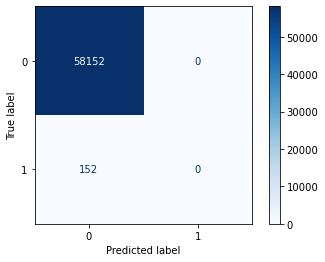

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9974    1.0000    0.9987     58152
           1     0.0000    0.0000    0.0000       152

    accuracy                         0.9974     58304
   macro avg     0.4987    0.5000    0.4993     58304
weighted avg     0.9948    0.9974    0.9961     58304



C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### This model is not able to detect the postive class for the f1 score. The imbalance has been previously corrected. Hence there could be some other reason or simply because the data doesn't have sufficient context to run through the deep network models.

## Keras with SKlearn

In [75]:
import tensorflow as tf


In [70]:
%%time

def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    #though you could return a compiled model, it's not necessary, and would result in the loss of these
    # parameters in the tune process - as they would be 'hard coded'
    # model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

    return model

CPU times: total: 0 ns
Wall time: 0 ns


In [71]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=1472,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()


CPU times: total: 31.2 ms
Wall time: 240 ms


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 1472,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [72]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['binary_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 1472,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [77]:
%%time

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='f1',  # we could use any appropriate sklearn metric here (i.e. accuracy, f1_micro, f1_macro)
    n_iter=50, 
    cv=3)

_ = rnd_search_cv.fit(X_train, y_train,  verbose=1)


Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 0.6893
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6690
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6491
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6207
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5793
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5216
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4679
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3912
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3124
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 0.6916
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6729
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6513
Epoch 4/10
7/

In [78]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.01,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (70,),
 'model__dropout': 0,
 'loss': 'binary_crossentropy',
 'epochs': 10,
 'batch_size': 100}

In [79]:
best_model = rnd_search_cv.best_estimator_

In [80]:
%%time

print(f"best score {best_model.score(X_test, y_test)}")
print(f"min loss {min(best_model.history_['loss'])}")

584/584 [==============================] - 2s 4ms/step
best score 0.8650521405049396
min loss 0.012191354297101498
CPU times: total: 11.9 s
Wall time: 5.67 s


In [81]:
best_model.history_

defaultdict(list,
            {'loss': [0.6475847363471985,
              0.4549596607685089,
              0.2587954103946686,
              0.12363141775131226,
              0.057438019663095474,
              0.03359738364815712,
              0.023105761036276817,
              0.017259053885936737,
              0.014777634292840958,
              0.012191354297101498]})

584/584 [==============================] - 2s 3ms/step


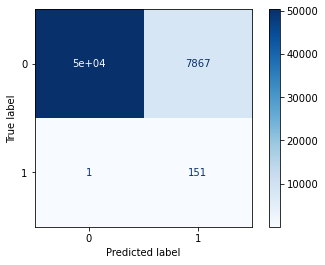

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test), digits=4))

584/584 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0     1.0000    0.8647    0.9274     58152
           1     0.0188    0.9934    0.0370       152

    accuracy                         0.8651     58304
   macro avg     0.5094    0.9291    0.4822     58304
weighted avg     0.9974    0.8651    0.9251     58304



##### The model's precision for class 1 is considerably low, indicating that it is not accurately predicting positive samples. On the other hand, the recall for class 1 is considerably high, indicating that the model is correctly identifying positive samples, but also has a large number of false positives.The f1-score for class 0 is 0.9274, indicating good balance between precision and recall for negative samples. However, the f1-score for class 1 is very low at 0.0370, suggesting poor performance in correctly identifying positive samples. This is consistent with the low precision for class 1 at 0.0188 and high recall for class 1 observed in the classification report. Overall, the weighted average f1-score of 0.9251 indicates decent overall performance of the model.

### CONCLUSION:
    
    While we can certainly say that the model performance has been considerably improved with the MLP classifier using sklearn and then by further tuning for the best parameters using the randomized search training of the data, we can also state that the next best tuning is definitely after predicting using the keras using sklearn. However, none of these models work their best with the dataset in hand. It would require a better dataset by augumenting the data or adding more features to the training data. However, comparing this assignment's results with that of the assignment 1 it is safe to say that the decision tree classifier is still the best predicting "model with the exhaustive grid search results. 